# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 
### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).
 

### Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

### Results Expected
A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

## Step 1: Importing Data

In [152]:
leads_dataframe = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
leads_dataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [153]:
leads_dataframe.shape

(9240, 37)

## Step 2: Inspecting the Dataframe

In [154]:
leads_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [155]:
leads_dataframe.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3 - Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [156]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']

In [157]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [158]:
# Applying the function to the housing list
leads_dataframe[varlist] = leads_dataframe[varlist].apply(binary_map)

#### Converting SELECTs into NaNs:

In [159]:
# Listing the categorical variables yet to be encoded
leads_dataframe.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [160]:
# Checking the labels of the remaining categorical columns
for col in leads_dataframe.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(leads_dataframe[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
blog              

In [161]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"
leads_dataframe = leads_dataframe.replace('Select', np.nan)

#### Dropping unnecessary columns

In [162]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads_dataframe.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [163]:
# Dropping unique valued columns
leads_dataframe = leads_dataframe.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

#### Missing Value 

In [164]:
# Checking the percentage of missing values
round(100*(leads_dataframe.isnull().sum()/len(leads_dataframe.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [165]:
# Removing all the columns that are no required and have 40% null values
leads_dataframe = leads_dataframe.drop(leads_dataframe.loc[:,list(round(leads_dataframe.isnull().sum()/leads_dataframe.shape[0], 2)>0.40)].columns, axis = 1)

In [166]:
# Rechecking the percentage of missing values
round(100*(leads_dataframe.isnull().sum()/len(leads_dataframe.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**Observations**
<br>There are five columns that still have high null values: `country`, `specialization`, `occupation`, `course_selection_reason`, and `city`. We will look at them individually to see what can be done

The distribution of data is heavily skewed in towards 'India (95%)' in 'Country' column and towards 'Better Career Prospects & NaN (99.9%)' in 'What matters most to you in choosing a course' column and 'Unemployed (85%)' in 'what is your current occupation' column. So it's safe to drop those columns.

In [167]:
# Dropping 'Country' and 'What matters most to you in choosing a course' columns
leads_dataframe = leads_dataframe.drop(['Country', 'What matters most to you in choosing a course', 'What is your current occupation'], axis = 1)

In [168]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
leads_dataframe['City'] = leads_dataframe['City'].replace(np.nan, 'Mumbai')

In [169]:
# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
leads_dataframe['Specialization'] = leads_dataframe['Specialization'].replace(np.nan, 'Other_Specialization')

In [170]:
# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
leads_dataframe['Tags'] = leads_dataframe['Tags'].replace(np.nan, 'Will revert after reading the email')

In [171]:
# Checking missing data percentage in the updated dataframe
round(100*(leads_dataframe.isnull().sum()/len(leads_dataframe.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable 

In [172]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
leads_dataframe.dropna(inplace=True)

In [173]:
leads_dataframe.drop(['Lead Number'], 1, inplace = True)

#### Handling categorical columns having low representation of categories

In [174]:
# determine unique values for all object datatype columns
for k, v in leads_dataframe.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Prospect ID = 9074
Lead Origin = 4
Lead Source = 21
Last Activity = 17
Specialization = 19
Tags = 26
City = 6
Last Notable Activity = 16


In [175]:
# Lead Source Column - We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis
leads_dataframe['Lead Source'] = leads_dataframe['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

In [176]:
# Last Activity Column - Converting all the low count categories to the 'Others' category
leads_dataframe['Last Activity'] = leads_dataframe['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

In [177]:
# Tags Column - Converting all low count categories to Others category
leads_dataframe['Tags'] = leads_dataframe['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [178]:
# Lead Origin Column - Converting all low count categories to Others category
leads_dataframe['Lead Origin'] = leads_dataframe['Lead Origin'].replace(['Lead Import','Lead Add Form','Quick Add Form'],'Lead Add Form and Others') 

## Step 4 - EDA

In [179]:
# Lets start with the target variable and see if we have any data imbalance or not 
leads_dataframe["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

We have good representation of both the classes of data and hence we are good to go with the further analysis



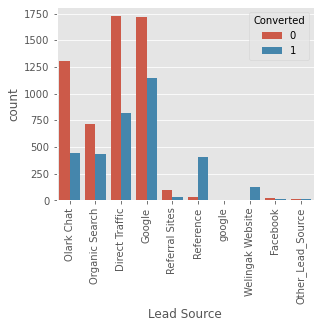

In [180]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(leads_dataframe[feature], hue=leads_dataframe["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

OBSERVATION:

- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

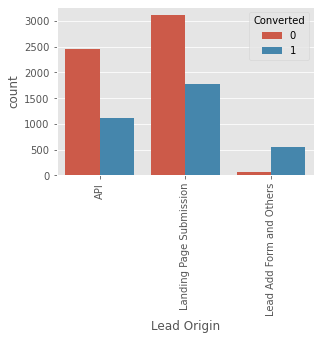

In [181]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(leads_dataframe[feature], hue=leads_dataframe["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

OBSERVATION:

- API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
- The count of leads from the Lead Add Form and Others is pretty low but the conversion rate is very high

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'

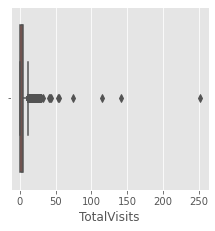

In [182]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(leads_dataframe[feature])
    plt.tight_layout()

In [183]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 
q1 = leads_dataframe["TotalVisits"].quantile(0.95)
leads_dataframe["TotalVisits"][leads_dataframe["TotalVisits"] >= q1] = q1

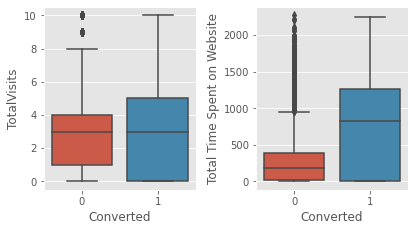

In [184]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = leads_dataframe)
    plt.tight_layout()

OBSERVATION:

- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information
- Users spending more time on the website are more likely to get converted

Websites can be made more appealing so as to increase the time of the Users on websites

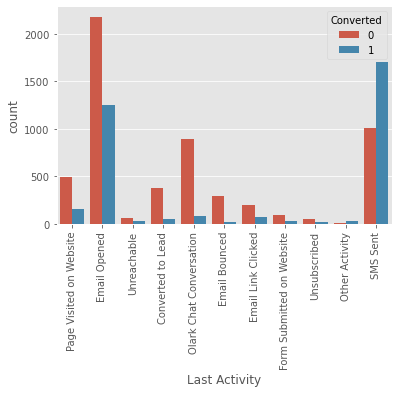

In [185]:
# Plotting the Last Activity again 

sns.countplot(x="Last Activity", hue="Converted", data= leads_dataframe)
plt.xticks(rotation='vertical')
plt.show()

OBSERVATION:

- The count of lst activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum

We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

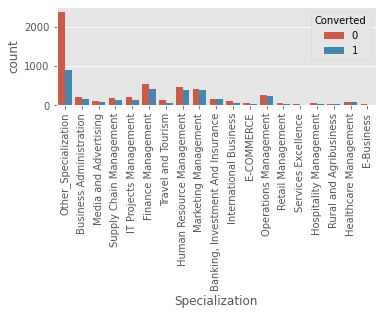

In [186]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=leads_dataframe)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

OBSERVATION:

- Looking at above plot, no particular inference can be made for Specialization
- Looking at above plot, we can say that working professionals have high conversion rate
- Number of Unemployed leads are more than any other category

To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

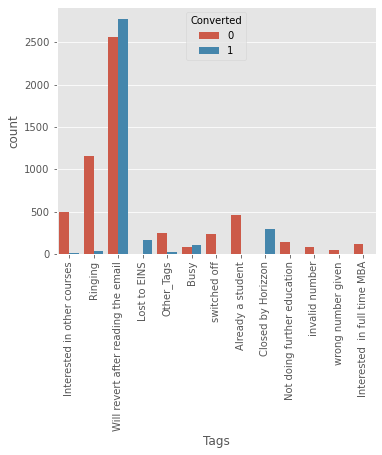

In [187]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=leads_dataframe)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

OBSERVATION:

- Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

## Step 5 - Dummy Variable Creation

In [188]:
# dummy encoding for the categorical variables
dummy = pd.get_dummies(leads_dataframe[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'Tags','City','Last Notable Activity']], drop_first=True)

In [189]:
# getting the cleaned df
leads_dataframe = leads_dataframe.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'Tags','City','Last Notable Activity'], axis=1)
leads_dataframe = pd.concat([leads_dataframe, dummy], axis=1)

In [190]:
leads_dataframe.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 6 - Correlations

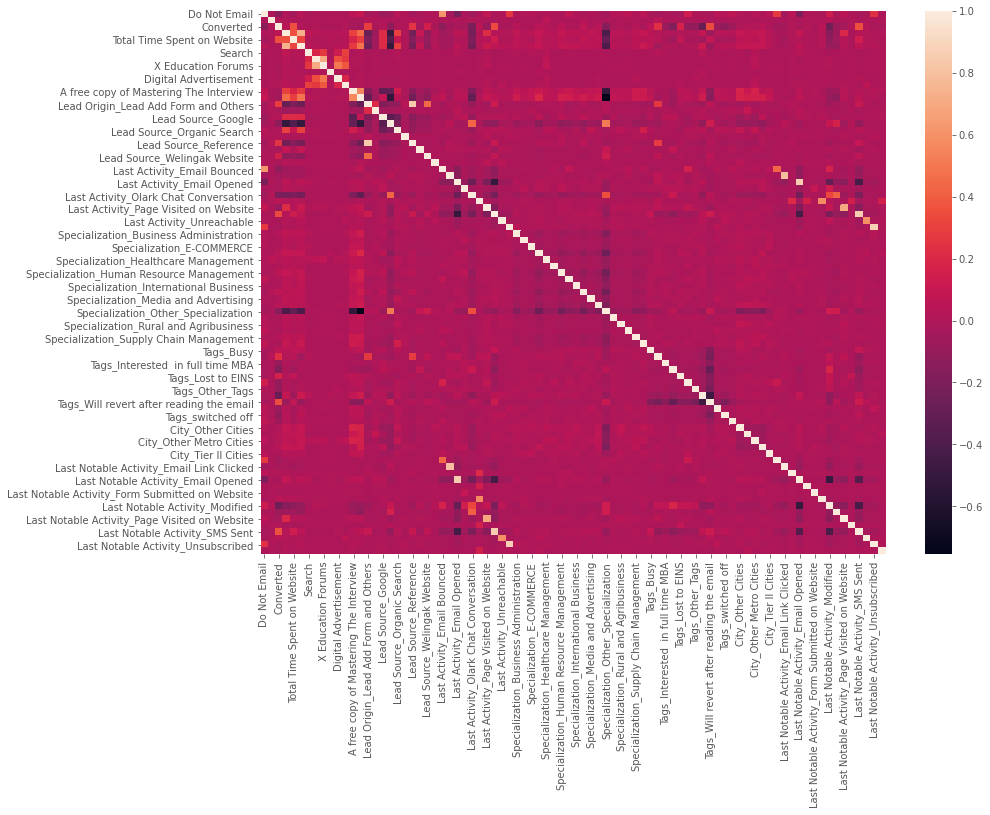

In [191]:
# visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(leads_dataframe.corr())
plt.show()

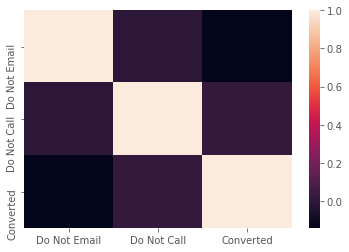

In [192]:
# heatmap of only continuous variables
sns.heatmap(leads_dataframe[leads_dataframe.columns[:4]].corr())
plt.show()

In [193]:
# columns pairs in order of highest absolute correlation
leads_dataframe.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

Do Not Email                                   Do Not Email                                1.000000
Last Notable Activity_Unsubscribed             Last Activity_Unsubscribed                  0.872656
Last Activity_Email Opened                     Last Notable Activity_Email Opened          0.861636
Last Notable Activity_SMS Sent                 Last Activity_SMS Sent                      0.853102
Lead Source_Reference                          Lead Origin_Lead Add Form and Others        0.843166
Last Activity_Email Link Clicked               Last Notable Activity_Email Link Clicked    0.800686
Lead Origin_Landing Page Submission            Specialization_Other_Specialization         0.755381
TotalVisits                                    Page Views Per Visit                        0.737996
Newspaper Article                              X Education Forums                          0.707068
Last Notable Activity_Page Visited on Website  Last Activity_Page Visited on Website       0.691811


In [194]:
# Dropping variables with high multi-collinearity
leads_dataframe.drop(['Last Notable Activity_Unsubscribed', 'Last Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Lead Source_Reference','Last Activity_Email Link Clicked'], axis=1, inplace=True)

In [195]:
# Top 5 features correlated with target variable
leads_dataframe.corr()['Converted'].abs().sort_values(ascending=False).head(6)[1:]

Total Time Spent on Website                 0.359261
Tags_Will revert after reading the email    0.348355
Last Activity_SMS Sent                      0.335815
Lead Origin_Lead Add Form and Others        0.291680
Tags_Ringing                                0.279873
Name: Converted, dtype: float64

## Step 7 - Train-Test Split

In [196]:
# Putting feature variable to X
X = leads_dataframe.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = leads_dataframe['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [197]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 8 - Scaling

In [198]:
# Scale the three numeric features present in the dataset
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.058552,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Step 9 - Model Building

In [199]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1638.7
Date:                Mon, 13 Jun 2022   Deviance:                       3277.4
Time:                        13:20:23   Pearson chi2:                 1.35e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -1.6146      0.825     -1.957      0.050      -3.231       0.002
Do Not Email                                          -1.5666      0.280     -5.592      0.000      -2.116      -1.017
Do Not Call                                           22.1513   1.38e+05      0.000      1.000   -2.71e+05    2.71e+05
TotalVisits                                            0.1010      0.076      1.337      0.181      -0.047       0.249
Total Time Spent on Website                            1.1767      0.055     21.320      0.000       1.069       1.285
Page Views Per Visit                                  -0.1396      0.074     -1.895      0.058      -0.284       0.005
Search                                                -0.3483      1.908     -0.183      0.855      -4.087       3.391
Newspaper Article                                     27.6182   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
X Education Forums                                   -56.5516   3.05e+05     -0.000      1.000   -5.99e+05    5.99e+05
Newspaper                                            -23.0677   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Digital Advertisement                                  0.3384      1.706      0.198      0.843      -3.005       3.682
Through Recommendations                                3.6105      3.799      0.950      0.342      -3.835      11.056
A free copy of Mastering The Interview                -0.4046      0.148     -2.728      0.006      -0.695      -0.114
Lead Origin_Landing Page Submission                   -1.3668      0.180     -7.583      0.000      -1.720      -1.014
Lead Origin_Lead Add Form and Others                   2.7665      0.376      7.355      0.000       2.029       3.504
Lead Source_Facebook                                  -1.6231      0.680     -2.388      0.017      -2.955      -0.291
Lead Source_Google                                    -0.1149      0.153     -0.749      0.454      -0.415       0.186
Lead Source_Olark Chat                                 0.6961      0.209      3.328      0.001       0.286       1.106
Lead Source_Organic Search                             0.1392      0.175      0.796      0.426      -0.204       0.482
Lead Source_Other_Lead_Source                         -0.6171      0.751     -0.821      0.411      -2.090       0.855
Lead Source_Referral Sites                            -0.0906      0.404     -0.224      0.823      -0.883       0.702
Lead Source_Welingak Website                           2.0119      0.809      2.487      0.013       0.426       3.597
Lead Source_google                                   -23.5580   9.58e+04     -0.000      1.000   -1.88e+05  

#### Feature selection using RFE

In [200]:
# initiate logistic regression
logreg = LogisticRegression()

# initiate rfe
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [201]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False])

In [202]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 49),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 45),
 ('Search', False, 31),
 ('Newspaper Article', False, 16),
 ('X Education Forums', False, 20),
 ('Newspaper', False, 50),
 ('Digital Advertisement', False, 37),
 ('Through Recommendations', False, 28),
 ('A free copy of Mastering The Interview', False, 26),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form and Others', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Other_Lead_Source', False, 25),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 27),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation'

In [203]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [204]:
# Select only the columns selected by RFE
X_train = X_train[col]

#### Assessing the model with StatsModels

In [205]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2133.2
Date:                Mon, 13 Jun 2022   Deviance:                       4266.4
Time:                        13:20:36   Pearson chi2:                 1.17e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8949      0.197     -4.534      0.000      -1.282      -0.508
Do Not Email                                     -1.8979      0.193     -9.817      0.000      -2.277      -1.519
Lead Origin_Lead Add Form and Others              2.3359      0.249      9.388      0.000       1.848       2.824
Lead Source_Welingak Website                      1.4872      0.797      1.865      0.062      -0.075       3.050
Tags_Busy                                         2.4008      0.292      8.208      0.000       1.828       2.974
Tags_Closed by Horizzon                           8.1651      0.737     11.074      0.000       6.720       9.610
Tags_Lost to EINS                                 8.0399      0.744     10.813      0.000       6.583       9.497
Tags_Ringing                                     -1.9547      0.305     -6.406      0.000      -2.553      -1.357
Tags_Will revert after reading the email          3.0839      0.185     16.680      0.000       2.722       3.446
Tags_invalid number                             -22.2541   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Tags_switched off                                -1.7318      0.550     -3.151      0.002      -2.809      -0.655
Last Notable Activity_Email Link Clicked         -3.1105      0.292    -10.661      0.000      -3.682      -2.539
Last Notable Activity_Email Opened               -2.2101      0.113    -19.597      0.000      -2.431      -1.989
Last Notable Activity_Modified                   -3.3458      0.118    -28.341      0.000      -3.577      -3.114
Last Notable Activity_Olark Chat Conversation    -3.9980      0.323    -12.393      0.000      -4.630      -3.366
Last Notable Activity_Page Visited on Website    -2.7850      0.229    -12.181      0.000      -3.233      -2.337
=================================================================================================================
"""

## Step 10 - Model Evalualtion

In [206]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.494730
1012    0.572265
9226    0.002035
4750    0.899255
7987    0.978102
1281    0.899255
2880    0.494730
4971    0.818452
7536    0.494730
1248    0.002035
dtype: float64

In [207]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49472997, 0.57226519, 0.00203471, 0.89925513, 0.97810167,
       0.89925513, 0.49472997, 0.818452  , 0.49472997, 0.00203471])

In [208]:
# Creating a dataframe with the true convertion status and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.494730,3009
1,0,0.572265,1012
2,0,0.002035,9226
3,1,0.899255,4750
4,1,0.978102,7987


In [209]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.494730,3009,0
1,0,0.572265,1012,1
2,0,0.002035,9226,0
3,1,0.899255,4750,1
4,1,0.978102,7987,1


In [210]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8360888049126122


#### Checking VIFs

In [211]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2133.2
Date:                Mon, 13 Jun 2022   Deviance:                       4266.4
Time:                        13:20:43   Pearson chi2:                 1.17e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8949      0.197     -4.534      0.000      -1.282      -0.508
Do Not Email                                     -1.8979      0.193     -9.817      0.000      -2.277      -1.519
Lead Origin_Lead Add Form and Others              2.3359      0.249      9.388      0.000       1.848       2.824
Lead Source_Welingak Website                      1.4872      0.797      1.865      0.062      -0.075       3.050
Tags_Busy                                         2.4008      0.292      8.208      0.000       1.828       2.974
Tags_Closed by Horizzon                           8.1651      0.737     11.074      0.000       6.720       9.610
Tags_Lost to EINS                                 8.0399      0.744     10.813      0.000       6.583       9.497
Tags_Ringing                                     -1.9547      0.305     -6.406      0.000      -2.553      -1.357
Tags_Will revert after reading the email          3.0839      0.185     16.680      0.000       2.722       3.446
Tags_invalid number                             -22.2541   1.44e+04     -0.002      0.999   -2.83e+04    2.82e+04
Tags_switched off                                -1.7318      0.550     -3.151      0.002      -2.809      -0.655
Last Notable Activity_Email Link Clicked         -3.1105      0.292    -10.661      0.000      -3.682      -2.539
Last Notable Activity_Email Opened               -2.2101      0.113    -19.597      0.000      -2.431      -1.989
Last Notable Activity_Modified                   -3.3458      0.118    -28.341      0.000      -3.577      -3.114
Last Notable Activity_Olark Chat Conversation    -3.9980      0.323    -12.393      0.000      -4.630      -3.366
Last Notable Activity_Page Visited on Website    -2.7850      0.229    -12.181      0.000      -3.233      -2.337
=================================================================================================================
"""

In [212]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,2.00
11,Last Notable Activity_Email Opened,1.61
12,Last Notable Activity_Modified,1.57
1,Lead Origin_Lead Add Form and Others,1.48
2,Lead Source_Welingak Website,1.29
4,Tags_Closed by Horizzon,1.23
6,Tags_Ringing,1.20
0,Do Not Email,1.12
14,Last Notable Activity_Page Visited on Website,1.07
5,Tags_Lost to EINS,1.06


VIF seem to be in a decent range. 

Let's first drop 'Tags_invalid number' since it has high p-value	

In [213]:
# Dropping'Tags_invalid number'
X_train.drop('Tags_invalid number', axis = 1, inplace = True)

In [214]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2139.6
Date:                Mon, 13 Jun 2022   Deviance:                       4279.3
Time:                        13:20:46   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1029      0.194     -5.699      0.000      -1.482      -0.724
Do Not Email                                     -1.8814      0.192     -9.787      0.000      -2.258      -1.505
Lead Origin_Lead Add Form and Others              2.3528      0.250      9.403      0.000       1.862       2.843
Lead Source_Welingak Website                      1.4644      0.797      1.838      0.066      -0.097       3.026
Tags_Busy                                         2.5930      0.291      8.915      0.000       2.023       3.163
Tags_Closed by Horizzon                           8.3376      0.738     11.302      0.000       6.892       9.783
Tags_Lost to EINS                                 8.2118      0.744     11.040      0.000       6.754       9.670
Tags_Ringing                                     -1.7558      0.303     -5.787      0.000      -2.351      -1.161
Tags_Will revert after reading the email          3.2629      0.185     17.591      0.000       2.899       3.626
Tags_switched off                                -1.5288      0.548     -2.788      0.005      -2.604      -0.454
Last Notable Activity_Email Link Clicked         -3.0764      0.292    -10.548      0.000      -3.648      -2.505
Last Notable Activity_Email Opened               -2.1769      0.111    -19.551      0.000      -2.395      -1.959
Last Notable Activity_Modified                   -3.3114      0.117    -28.364      0.000      -3.540      -3.083
Last Notable Activity_Olark Chat Conversation    -3.9674      0.322    -12.314      0.000      -4.599      -3.336
Last Notable Activity_Page Visited on Website    -2.7523      0.228    -12.058      0.000      -3.200      -2.305
=================================================================================================================
"""

In [215]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,1.99
10,Last Notable Activity_Email Opened,1.60
11,Last Notable Activity_Modified,1.56
1,Lead Origin_Lead Add Form and Others,1.48
2,Lead Source_Welingak Website,1.29
4,Tags_Closed by Horizzon,1.23
6,Tags_Ringing,1.20
0,Do Not Email,1.11
13,Last Notable Activity_Page Visited on Website,1.07
5,Tags_Lost to EINS,1.06


VIF seem to be in a decent range. 

Let's first drop 'Lead Source_Welingak Website	' since it has high p-value	

In [216]:
# Dropping 'Lead Source_Welingak Website'
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [217]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.9
Date:                Mon, 13 Jun 2022   Deviance:                       4283.8
Time:                        13:20:49   Pearson chi2:                 1.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1178      0.194     -5.764      0.000      -1.498      -0.738
Do Not Email                                     -1.8618      0.191     -9.753      0.000      -2.236      -1.488
Lead Origin_Lead Add Form and Others              2.5813      0.233     11.101      0.000       2.126       3.037
Tags_Busy                                         2.6059      0.291      8.954      0.000       2.035       3.176
Tags_Closed by Horizzon                           8.3409      0.738     11.305      0.000       6.895       9.787
Tags_Lost to EINS                                 8.2204      0.744     11.052      0.000       6.763       9.678
Tags_Ringing                                     -1.7839      0.305     -5.840      0.000      -2.383      -1.185
Tags_Will revert after reading the email          3.2764      0.186     17.627      0.000       2.912       3.641
Tags_switched off                                -1.5150      0.548     -2.762      0.006      -2.590      -0.440
Last Notable Activity_Email Link Clicked         -3.0794      0.292    -10.532      0.000      -3.652      -2.506
Last Notable Activity_Email Opened               -2.1759      0.111    -19.549      0.000      -2.394      -1.958
Last Notable Activity_Modified                   -3.3065      0.117    -28.368      0.000      -3.535      -3.078
Last Notable Activity_Olark Chat Conversation    -3.9659      0.322    -12.312      0.000      -4.597      -3.335
Last Notable Activity_Page Visited on Website    -2.7441      0.227    -12.069      0.000      -3.190      -2.298
=================================================================================================================
"""

In [218]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Will revert after reading the email,1.99
9,Last Notable Activity_Email Opened,1.60
10,Last Notable Activity_Modified,1.56
3,Tags_Closed by Horizzon,1.23
5,Tags_Ringing,1.20
1,Lead Origin_Lead Add Form and Others,1.19
0,Do Not Email,1.11
12,Last Notable Activity_Page Visited on Website,1.07
4,Tags_Lost to EINS,1.06
11,Last Notable Activity_Olark Chat Conversation,1.04


Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.



In [219]:
X_train_sm.shape

(6351, 14)

In [220]:
col = X_train.columns[:]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form and Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [221]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.495669,3009,0
1,0,0.573673,1012,1
2,0,0.002009,9226,0
3,1,0.896470,4750,1
4,1,0.978035,7987,1


In [222]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8360888049126122


#### Metrics beyond simply accuracy

In [223]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3757,  148],
       [ 893, 1553]], dtype=int64)

In [224]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [225]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6349141455437449

In [226]:
# Let us calculate specificity
TN / float(TN+FP)

0.9620998719590269

## Step 11 - Plotting ROC Curve

In [227]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [228]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

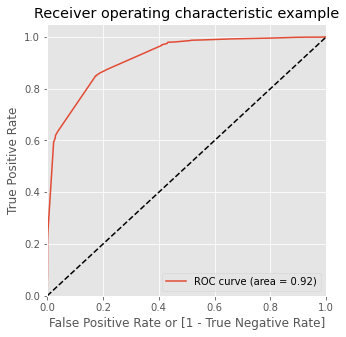

In [229]:
# Call the ROC function
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

## Step 12 - Finding Optimal Cutoff Point

In [230]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.495669,3009,0,1,1,1,1,1,0,0,0,0,0
1,0,0.573673,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.002009,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.896470,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.978035,7987,1,1,1,1,1,1,1,1,1,1,1


In [231]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.725083  0.979558  0.565685
0.2   0.2  0.735790  0.969338  0.589501
0.3   0.3  0.826956  0.864677  0.803329
0.4   0.4  0.833884  0.851186  0.823047
0.5   0.5  0.836089  0.634914  0.962100
0.6   0.6  0.835144  0.619379  0.970294
0.7   0.7  0.835144  0.619379  0.970294
0.8   0.8  0.835144  0.619379  0.970294
0.9   0.9  0.708707  0.247751  0.997439


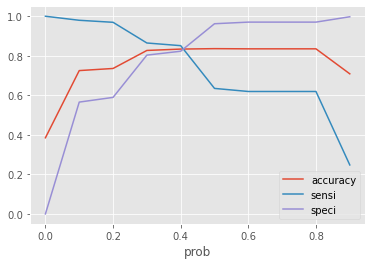

In [232]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [233]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.495669,3009,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.573673,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.002009,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.896470,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.978035,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [234]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8337269721303732

In [235]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3215,  690],
       [ 366, 2080]], dtype=int64)

In [236]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [237]:
# Calculate Sensitivity
TP/(TP+FN)

0.8503679476696647

In [238]:
# Calculate Specificity
TN/(TN+FP)

0.8233034571062741

Observation:

After running the model on the Train Data these are the figures we obtain:
- Accuracy : 83.37%
- Sensitivity : 85.03%
- Specificity :82.33%

## Step 13 - Precision & Recall

In [239]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion3

array([[3215,  690],
       [ 366, 2080]], dtype=int64)

In [242]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7509025270758123

In [243]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8503679476696647

#### Precision and recall tradeoff


In [244]:
y_train_pred_final.Convert, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Convert, Length: 6351, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

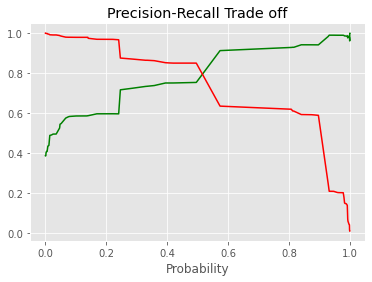

In [245]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

## Step 14 - Making predictions on the test set

In [246]:
# Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [247]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.shape

(2723, 13)

In [248]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,Lead Origin_Lead Add Form and Others,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
7936,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
3830,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
2879,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0
7155,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [249]:
# Getting the predicted values on the train set
y_test_pred = res.predict(X_test_sm)

In [250]:
# Coverting it to df
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.495669
1490,0.495669
7936,0.495669
4216,0.998496
3830,0.495669


In [251]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [252]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [253]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [254]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [255]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Convert_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Convert_Prob
0,0,3271,0.495669
1,1,1490,0.495669
2,0,7936,0.495669
3,1,4216,0.998496
4,0,3830,0.495669


In [256]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Convert_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,Lead_Score
0,3271,0,0.495669,50
1,1490,1,0.495669,50
2,7936,0,0.495669,50
3,4216,1,0.998496,100
4,3830,0,0.495669,50


In [257]:
# Make predictions on the test set using 0.4 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [258]:
# Check y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,Lead_Score,final_predicted
0,3271,0,0.495669,50,1
1,1490,1,0.495669,50,1
2,7936,0,0.495669,50,1
3,4216,1,0.998496,100,1
4,3830,0,0.495669,50,1


In [259]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8196841718692618

In [260]:
# Creating confusion matrix 
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1417,  317],
       [ 174,  815]], dtype=int64)

In [261]:
# Substituting the value of true positive
TP = confusion4[1,1]
# Substituting the value of true negatives
TN = confusion4[0,0]
# Substituting the value of false positives
FP = confusion4[0,1] 
# Substituting the value of false negatives
FN = confusion4[1,0]

In [262]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8240647118301314

In [263]:
# Let us calculate specificity
TN / float(TN+FP)

0.8171856978085352

In [264]:
# Precision Score
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7199646643109541

In [265]:
# Recall score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8240647118301314

Observation:

After running the model on the Test Data these are the figures we obtain:
- Accuracy : 81.96%
- Sensitivity : 82.40%
- Specificity : 81.71%

Final Observation: Let us compare the values obtained for Train & Test

Train Data: 
- Accuracy : 83.37%
- Sensitivity : 85.03%
- Specificity :82.33%

Test Data: 
- Accuracy : 81.96%
- Sensitivity : 82.40%
- Specificity : 81.71%